## Segmentation of Signals

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook illustrates the segmentation of signals using analytic signals and by varying the parameters of the segmentation. First the function `segments(signal, segment_size=32, hop_size=16, window=None)` is defined which segments a signal $x[k]$ into potentially overlapping and windowed segments $x_n[k]$ whereby

\begin{equation}
x_n[k] = w[k] \cdot x[k + nP] \qquad \text{for } k = 0,1, \dots, F-1
\end{equation}

with the segment length $F$, the hop size $P$ and the window function $w[k]$. The segments are returned as a matrix whereby the first dimension represents the segment index $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def segments(signal, segment_size=32, hop_size=16, window=None):
    '''Split signal into overlapping windowed segments.'''

    # calculate total number of segments
    nseg = (len(signal) - segment_size) // hop_size + 1
    # split signal into segments
    segments = [signal[n*hop_size:n*hop_size+segment_size]
                for n in range(nseg)]
    # window segments
    if window is not None:
        segments = window(segment_size).reshape(1, -1) * segments

    return np.array(segments)

### Non-Overlapping Segments

As initial example, the segmentation of a cosine signal $x[k] = \cos(\Omega_0 k)$ with a period of $N_0 = 32$ samples is considered $\Omega_0 = \frac{2 \pi}{N_0}$. The segmentation is performed with non-overlapping segments of length $F = 32$ and a rectangular window function $w[k] = \text{rect}_{F}[k]$. For non-overlapping consecutive segments the hop size is chosen as $P = F$.

In [3]:
k = np.arange(128)
x = np.cos(k * 2*np.pi/32)

xn1 = segments(x, segment_size=32, hop_size=32)

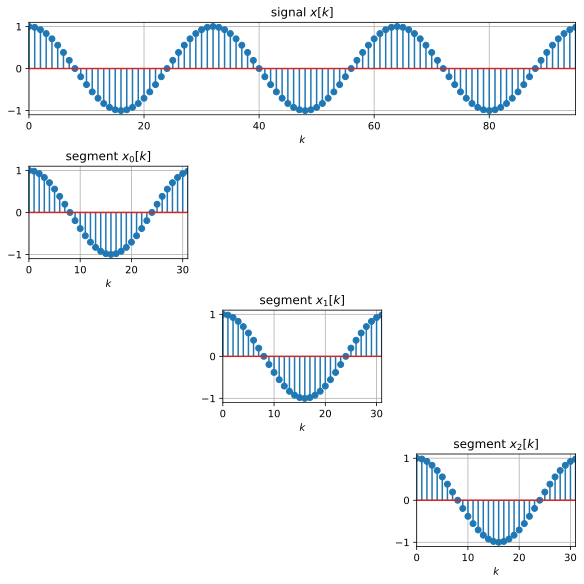

In [4]:
def plot_signal(x, ax, title):
    ax.stem(x)
    ax.set_xlabel(r'$k$')
    ax.set_title(title)
    ax.set_xlim([0, len(x)-1])
    ax.grid()


fig = plt.figure(figsize=(8, 8), constrained_layout=True)
gs = fig.add_gridspec(4, 3)

ax = fig.add_subplot(gs[0, :])
plot_signal(x[0:3*32], ax, r'signal $x[k]$')

for n in range(3):
    ax = fig.add_subplot(gs[n+1, n])
    plot_signal(xn1[n, :], ax, r'segment $x_{}[k]$'.format(n))

From non-overlapping consecutive segments $x_n[k]$ the original signal can be recovered by concatenating the segments

\begin{equation}
x_\text{r}[k] = \sum_{n=0}^{N-1} x_n[k - nP]
\end{equation}

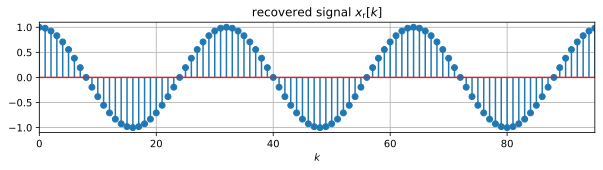

In [5]:
xr = np.hstack(xn1)

fig, ax = plt.subplots(figsize=(10, 2))
plot_signal(xr[0:3*32], ax, r'recovered signal $x_\mathrm{r}[k]$')

### Overlapping Segments

Now the case of overlapping segments with the same segment length $F = 32$ as before but an hop size of $P=16$ samples is chosen. This results in an overlap of $16$ samples or $50$% of the samples per segment.

In [6]:
xn2 = segments(x, segment_size=32, hop_size=16)

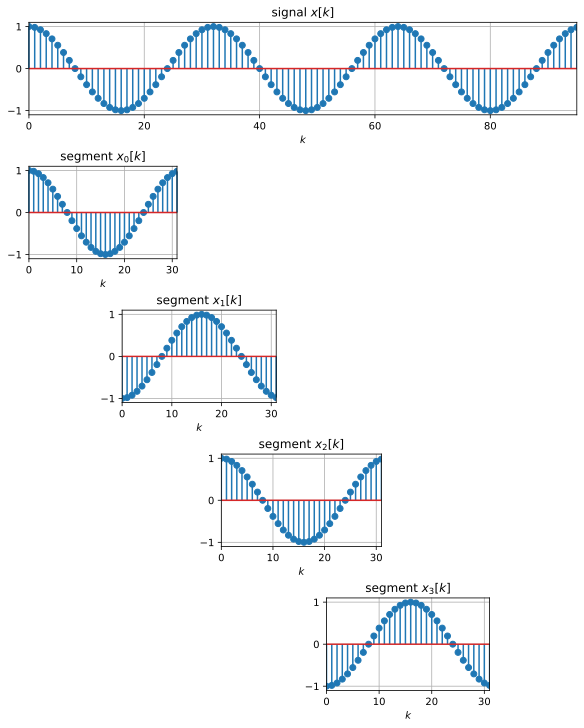

In [7]:
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = fig.add_gridspec(5, 6)

ax = fig.add_subplot(gs[0, :])
plot_signal(x[0:3*32], ax, r'signal $x[k]$')

for n in range(4):
    ax = fig.add_subplot(gs[n+1, n:n+2])
    plot_signal(xn2[n, :], ax, r'segment $x_{}[k]$'.format(n))

### Windowed Overlapping Segments

Finally, the case of overlapping segments is considered using the same parameters as before, but now the segments are additionally windowed by an [Hanning window](https://en.wikipedia.org/wiki/Hann_function).

In [8]:
xn3 = segments(x, segment_size=32, hop_size=16, window=np.hanning)

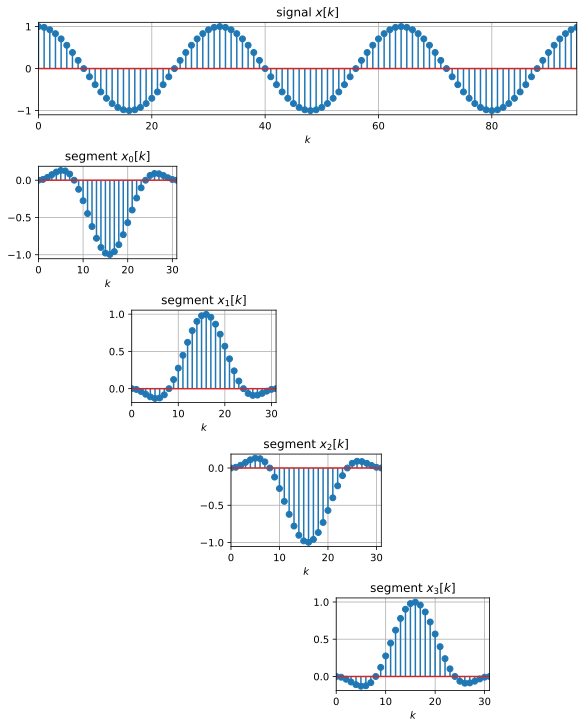

In [9]:
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
gs = fig.add_gridspec(5, 6)

ax = fig.add_subplot(gs[0, :])
plot_signal(x[0:3*32], ax, r'signal $x[k]$')

for n in range(4):
    ax = fig.add_subplot(gs[n+1, n:n+2])
    plot_signal(xn3[n, :], ax, r'segment $x_{}[k]$'.format(n))

### Alternative Implementation

As segmentation is a common operation applied to signals, its implementation is available in various toolkits. For instance in the audio and music processing toolkit [`librosa`](https://librosa.org/). Here the function [`librosa.util.frame`](https://librosa.org/doc/main/generated/librosa.util.frame.html) splits a given array (signal) into overlapping segments (*frames*). For instance for the above example of overlapping segments without windowing

In [10]:
from librosa.util import frame

xn4 = frame(x, frame_length=32, hop_length=16)

Note, the segments are returned as a matrix whereby the second dimension represents the segment index $n$.

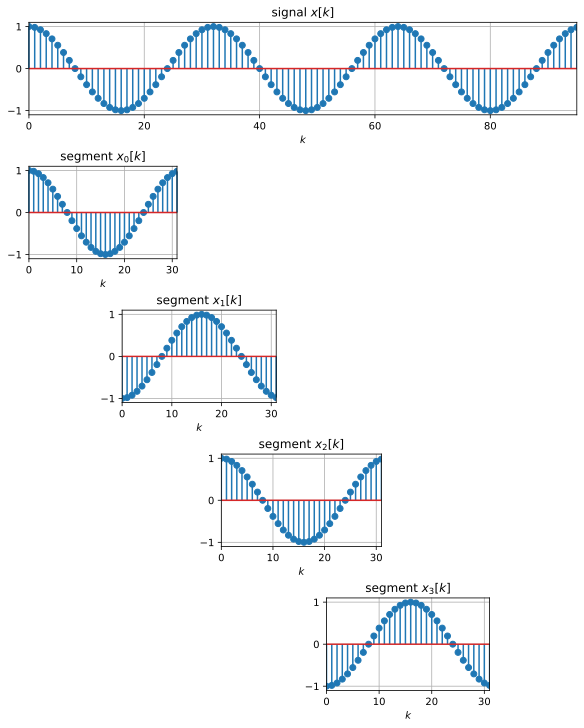

In [11]:
fig = plt.figure(figsize=(8,10), constrained_layout=True)
gs = fig.add_gridspec(5, 6)

ax = fig.add_subplot(gs[0,:])
plot_signal(x[0:3*32], ax, r'signal $x[k]$')

for n in range(4):
    ax = fig.add_subplot(gs[n+1,n:n+2])
    plot_signal(xn4[:,n], ax, r'segment $x_{}[k]$'.format(n))

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.